In [6]:
import numpy as np
import polars as pl
import pandas as pd
import matplotlib.pyplot as mpl
from pandas_datareader import data as wb

In [43]:
df_pg_1 = pd.read_csv("../files/data_historical_PG.csv", decimal=',', thousands='M')
df_pg_2 = pd.read_csv("../files/data_historical_PG_2.csv", decimal=',', thousands='M')

df_pg = pd.concat([df_pg_1, df_pg_2])


In [60]:
# transform the data to correct dtype
df_pg['Fecha'] = pd.to_datetime(df_pg['Fecha'], format="%d.%m.%Y")
df_pg['Último'] = df_pg['Último'].astype(float)
df_pg['Apertura'] = df_pg['Apertura'].astype(float)
df_pg['Máximo'] = df_pg['Máximo'].astype(float)
df_pg['Mínimo'] = df_pg['Mínimo'].astype(float)


In [59]:
df_pg = df_pg.set_index('Fecha')

0      1995-01-03
1      1995-01-04
2      1995-01-05
3      1995-01-06
4      1995-01-09
          ...    
2604   2025-03-20
2605   2025-03-21
2606   2025-03-24
2607   2025-03-25
2608   2025-03-26
Name: Fecha, Length: 7609, dtype: datetime64[ns]

In [70]:
df_pg.head()

,Último,Apertura,Máximo,Mínimo,Vol.,% var.,simple_return
Fecha,,,,,,,
1995-01-03,15.47,15.35,15.51,15.32,"3,32M","0,59%",NaN
1995-01-04,15.35,15.41,15.54,15.20,"2,22M","-0,78%",-0.007757
1995-01-05,15.13,15.26,15.32,15.10,"2,32M","-1,43%",-0.014332
1995-01-06,15.16,15.04,15.29,15.04,"3,44M","0,20%",0.001983
1995-01-09,15.10,15.23,15.29,15.07,"1,80M","-0,40%",-0.003958


In [62]:
df_pg.tail()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.,simple_return
2604,2025-03-20,167.55,168.89,169.21,166.03,"8,79M","-0,61%",-0.006051
2605,2025-03-21,166.69,167.14,168.14,164.12,"16,03M","-0,51%",-0.005133
2606,2025-03-24,165.65,166.43,166.87,165.36,"6,10M","-0,62%",-0.006239
2607,2025-03-25,162.85,163.12,165.37,162.20,"8,37M","-1,69%",-0.016903
2608,2025-03-26,165.69,163.30,165.84,163.00,"2,68M","1,74%",0.017439


## Simple Rate of Return

P1 - P0 / P0 = P1 / P0 = 1

In [71]:
df_pg['simple_return'] = (df_pg['Último'] / df_pg['Último'].shift(1)) - 1
print(df_pg['simple_return'])

Fecha
1995-01-03         NaN
1995-01-04   -0.007757
1995-01-05   -0.014332
1995-01-06    0.001983
1995-01-09   -0.003958
                ...   
2025-03-20   -0.006051
2025-03-21   -0.005133
2025-03-24   -0.006239
2025-03-25   -0.016903
2025-03-26    0.017439
Name: simple_return, Length: 7609, dtype: float64


<Axes: xlabel='Fecha'>

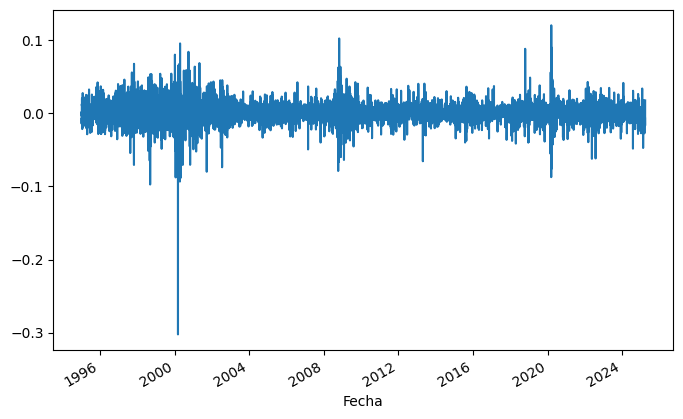

In [72]:
df_pg['simple_return'].plot(figsize=(8,5))

In [73]:
 # Calculate the mean of simple rate return
avg_returns_d = df_pg['simple_return'].mean()
avg_returns_d

np.float64(0.00040881286972611577)

In [74]:
# Calculate the mean by days worked, the mean are 250 days, depends on the year
avg_returns_a = df_pg['simple_return'].mean() * 250
avg_returns_a

np.float64(0.10220321743152894)

In [76]:
# Estimation the avg for PG
print(str(round(avg_returns_a, 5) * 100) + ' %')

10.22 %
